In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt


# Function to fetch cryptocurrency data from Binance API
def fetch_cryptocurrency_data(symbol, interval, limit):
    base_url = "https://api.binance.com/api/v3/klines"
    params = {
        "symbol": symbol + "USDT",
        "interval": interval,
        "limit": limit
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    return data

In [2]:
# Function to append the latest values to the dataset
def append_latest_data_to_csv(file_path, symbol, interval):
    data = fetch_cryptocurrency_data(symbol, interval, 1)
    latest_data = data[0]
    df = pd.read_csv(file_path)
    new_row = [latest_data[0], latest_data[1], latest_data[2], latest_data[3], latest_data[4], latest_data[5]]
    df.loc[len(df)] = new_row
    df.to_csv(file_path, index=False)

In [3]:
def update_master_dataset(file_path, symbol, interval):
    append_latest_data_to_csv(file_path, symbol, interval)

In [4]:
# Function to get the price of a crypto currency for a specific date
def get_price_for_date(file_path, target_date):
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    target_date = pd.to_datetime(target_date)
    
    closest_row = df.iloc[(df['timestamp'] - target_date).abs().argsort()[0]]
    return closest_row['close']


In [6]:
specific_date = "2023-08-26"

update_master_dataset("btc_data.csv", "BTC", "1d")  # Update the dataset
price_for_date = get_price_for_date("btc_data.csv", specific_date)
print(f"The BTC price on {specific_date} was ${price_for_date:.2f}")

update_master_dataset("etc_data.csv", "ETH", "1d")  # Update ETH dataset
eth_price_for_date = get_price_for_date("etc_data.csv",specific_date)
print(f"The ETH price on {specific_date} was ${eth_price_for_date:.2f}")

update_master_dataset("ltc_data.csv", "LTC", "1d")  # Update ETH dataset
ltc_price_for_date = get_price_for_date("ltc_data.csv",specific_date)
print(f"The LTC price on {specific_date} was ${ltc_price_for_date:.2f}")

The BTC price on 2023-08-26 was $26017.37
The ETH price on 2023-08-26 was $15.86
The LTC price on 2023-08-26 was $65.01


The BTC price on 2023-08-26 was $26017.37


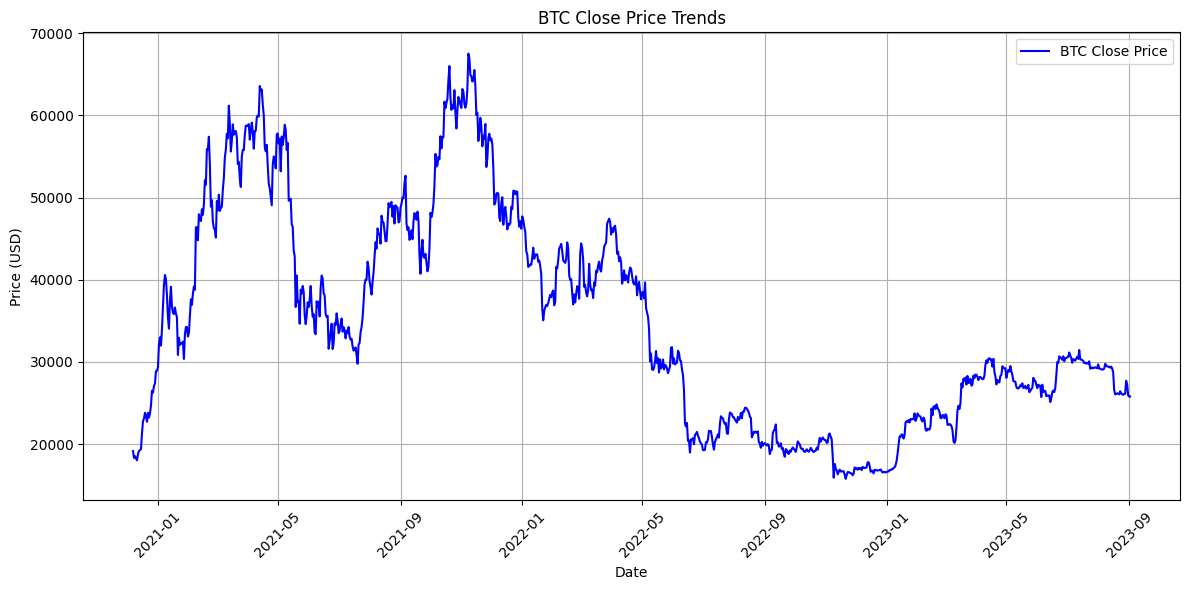

The ETH price on 2023-08-26 was $15.86


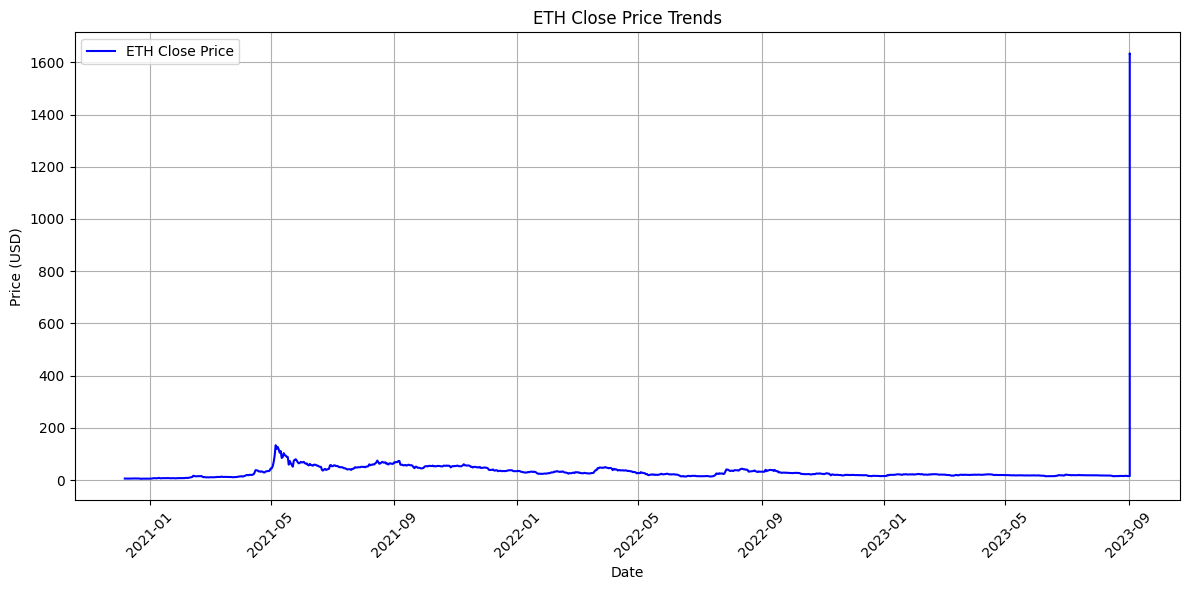

The LTC price on 2023-08-26 was $65.01


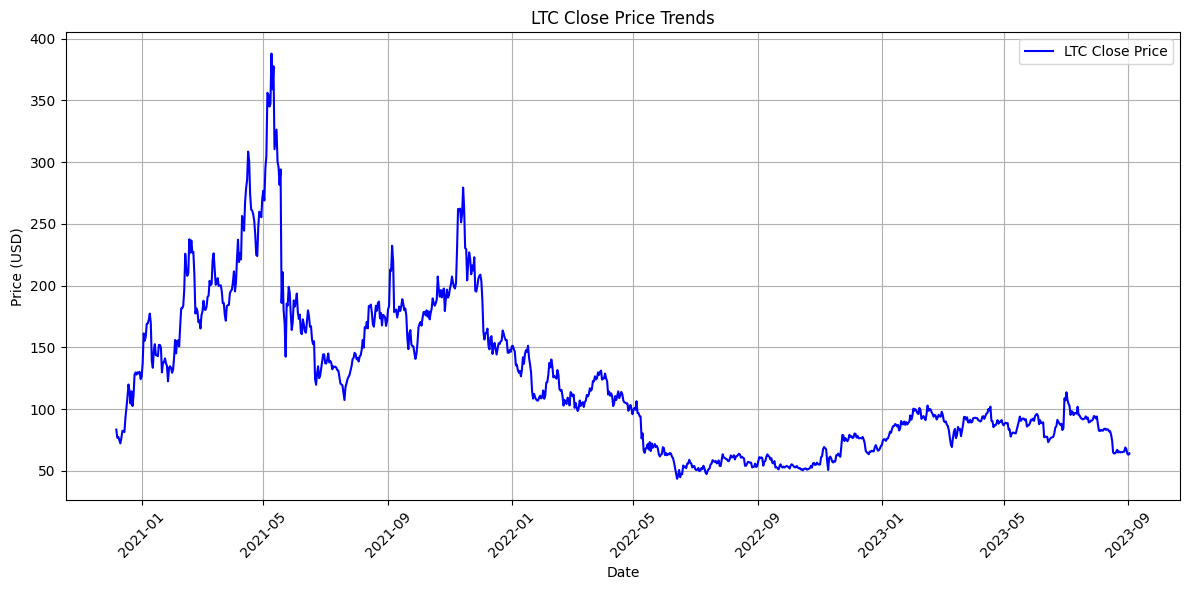

In [10]:

# List of cryptocurrency symbols
crypto_symbols = ["BTC", "ETH", "LTC"]

# Update and plot data for each cryptocurrency
for symbol in crypto_symbols:
    if symbol == "ETH":
        # Ethereum dataset filename is "etc_data.csv"
        update_master_dataset("etc_data.csv", symbol, "1d")  # Update the dataset
    else:
        update_master_dataset(f"{symbol.lower()}_data.csv", symbol, "1d")  # Update the dataset

    price_for_date = get_price_for_date("etc_data.csv" if symbol == "ETH" else f"{symbol.lower()}_data.csv", specific_date)
    print(f"The {symbol} price on {specific_date} was ${price_for_date:.2f}")

    # Read the dataset
    df = pd.read_csv("etc_data.csv" if symbol == "ETH" else f"{symbol.lower()}_data.csv")
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Create a line plot of the closing prices
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df['close'], label=f"{symbol} Close Price", color='blue')
    plt.title(f"{symbol} Close Price Trends")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()